In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
# api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'DRI'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

ticker and stock data

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

,DRI
Date,
2022-11-01 00:00:00-04:00,145.779922
2022-12-01 00:00:00-05:00,137.191208
2023-01-01 00:00:00-05:00,148.369995


change index to add in metriks df

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.head(3)

,DRI
Date_index,
1998-01-01,4.504398
1998-02-01,4.769362
1998-03-01,5.498017


key_metrics

In [8]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
2022,FY,75.352113,7.455399,9.828638,6.679186,3.29108,17.200313,2.204225,17.200313,38.79421,14709779808.299999,19176479808.299999,15.438476,1.527495,11.710676,17.232638,6.691739,6.691739,1.991327,12.528734,15.266682,22.465417,0.064773,0.058029,2.131198,0.783125,2.918267,0.638376,16.461756,1.318325,0.038274,0.59089,0.038754,0,0.189082,-0.320436,-0.041796,-1.092562,0.006282,53.714914,0.140222,0.115922,-57.337246,-668100000,281700000,-6758200000,2.223319,70100000,335700000,230700000,2.728972,17.540079,12.936346,133.75,20.809485,28.215078,0.433446,-3.149452
2021,FY,55.184816,4.82592,9.156442,7.083589,9.315184,21.572853,6.921012,21.572853,40.397239,18750215126.32,22738115126.32,29.795352,2.605608,15.703698,20.299031,6.665321,6.665321,3.159783,22.979399,19.043648,24.616342,0.033562,0.049263,1.783975,0.73601,4.030217,1.012336,9.949387,1.897346,0.010805,0.321945,0.055058,0,0.179296,-0.226382,-0.037562,-0.770305,0.010061,48.398859,0.073651,0.071957,-49.706672,22800000,902500000,-5971900000,1.849419,68200000,304500000,190800000,3.459235,19.489794,12.212324,105.514663,18.72775,29.887841,0.223703,-2.072853
2020,FY,63.625917,-0.427058,5.797066,1.848411,6.220864,18.999185,3.976365,18.999185,46.484108,9296978582.82,14175078582.82,-177.423255,1.190867,13.070404,40.991969,3.988066,3.988066,1.815712,55.829376,19.928411,62.500346,-0.005636,0.024395,2.232799,0.765617,19.212682,0.614346,0.770096,-13.574427,0.034667,-6.150763,0.048214,0,0.185329,-0.681147,-0.06206,-1.361337,0.006789,13.511455,0.005875,-0.006467,-54.692747,-691400000,487900000,-6513500000,2.419955,59000000,276950000,198850000,2.328325,14.226928,11.802532,156.76506,25.655573,30.925568,-0.022478,-3.948655


In [9]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [10]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [11]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

add_percent_columns

In [12]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

Vizualization key_metrics

In [13]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

In [14]:
''' necessary columns '''

km0 = f'{ticker}'
km1 = f'change % {ticker}'
km2 = 'SNP'
km3 = 'change % SNP'
km4 = 'change % debtToAssets'

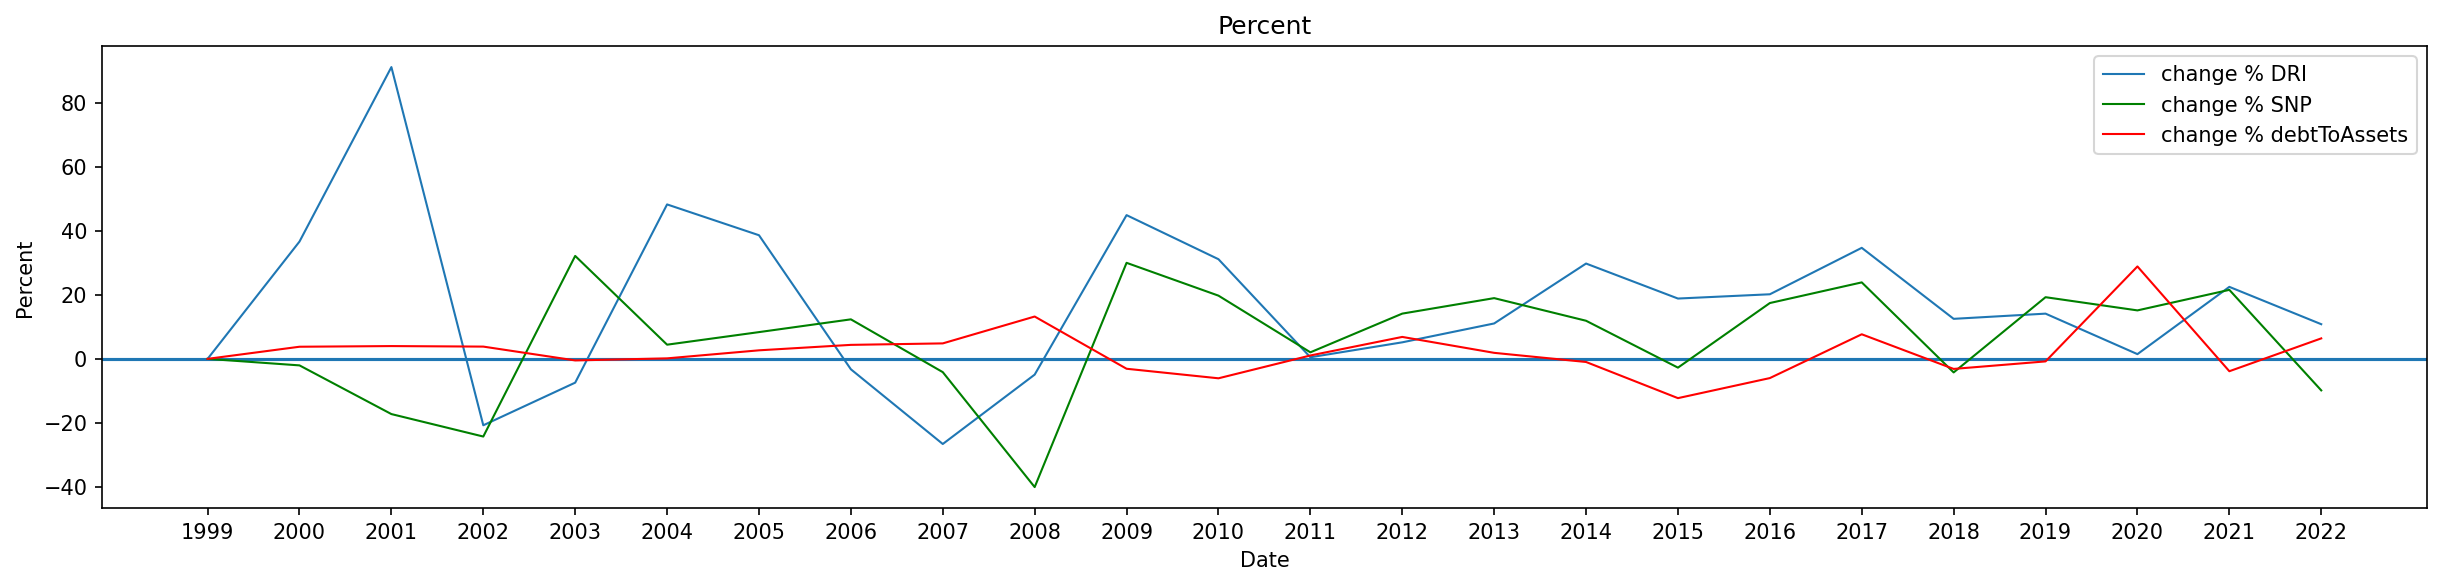

In [16]:
# plot size
figure(figsize=(20,4), dpi=150)
plt.axhline(y=0, linestyle='-')


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[km1],lw=1, label=km1)
plt.plot(df_with_changes_key[km3],'g',lw=1, label=km3)
plt.plot(df_with_changes_key[km4],'r',lw=1, label=km4)

# Add a legend to the axis
plt.legend()

plt.show()